In [2]:
!python -m pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 10.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 10.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 9.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 8.1 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 8.2 MB/s  0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -----------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# FSC22
fsc22 = pd.read_csv("FSC22/Metadata-20220916T202011Z-001/Metadata/Metadata V1.0 FSC22.csv")
# ESC-50
esc50 = pd.read_csv("ESC-50/meta/esc50.csv")

In [3]:
# FSC22: columna "Class Name"
fsc22_counts = fsc22["Class Name"].value_counts()

# ESC-50: columna "category"
esc50_counts = esc50["category"].value_counts()

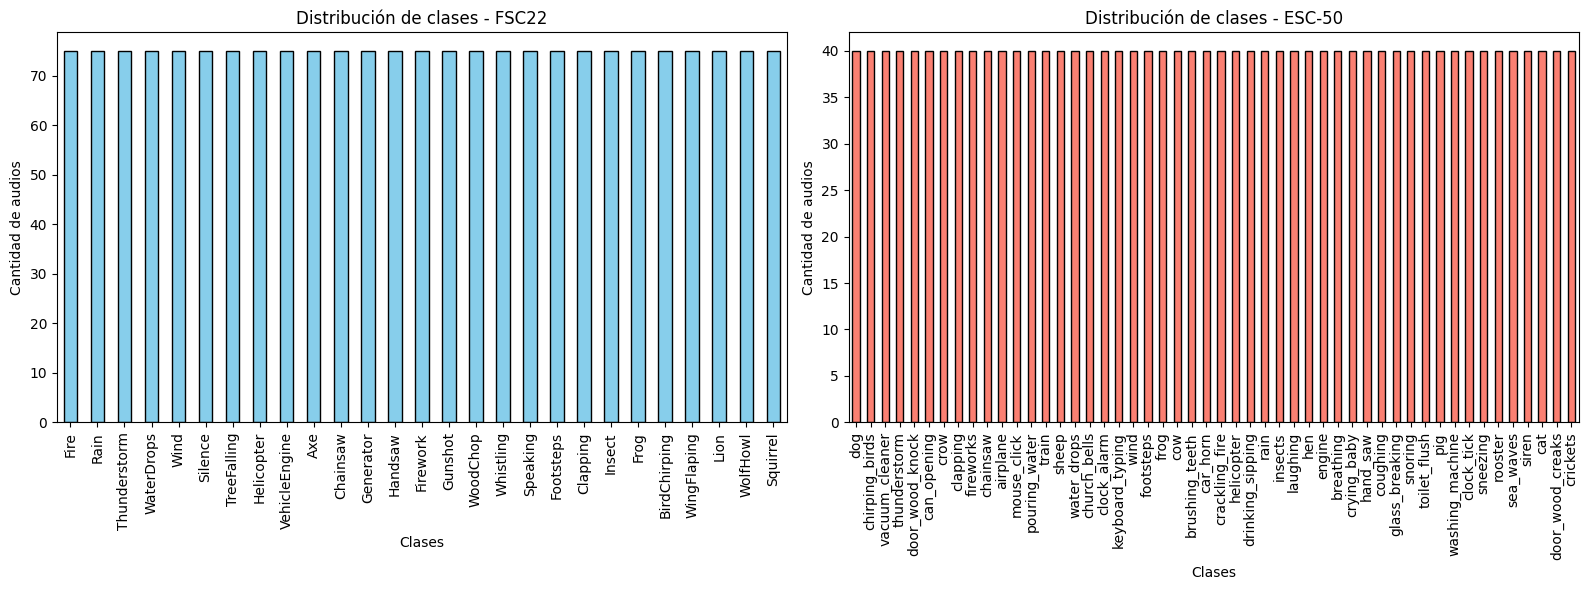

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- FSC22 ---
fsc22_counts.plot(kind="bar", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].set_title("Distribución de clases - FSC22")
ax[0].set_xlabel("Clases")
ax[0].set_ylabel("Cantidad de audios")
ax[0].tick_params(axis='x', rotation=90)

# --- ESC-50 ---
esc50_counts.plot(kind="bar", ax=ax[1], color="salmon", edgecolor="black")
ax[1].set_title("Distribución de clases - ESC-50")
ax[1].set_xlabel("Clases")
ax[1].set_ylabel("Cantidad de audios")
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

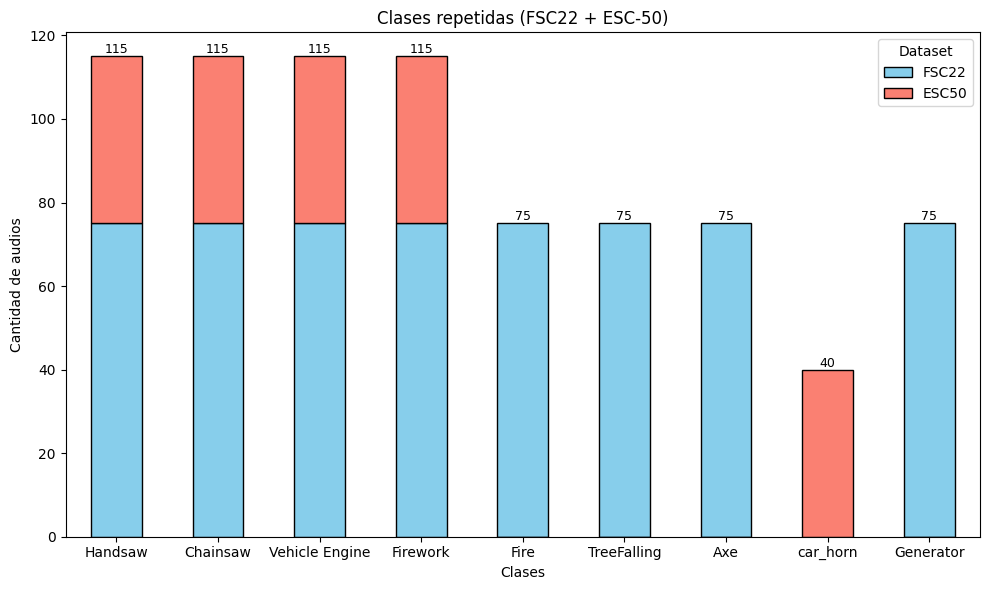

In [28]:

# ===== 2) Mapear SOLO clases repetidas =====
# Mapeo para FSC22 (columna "Class Name")
fsc22_map = {
    "handsaw": "Handsaw",
    "vehicleengine": "Vehicle Engine",
    "chainsaw": "Chainsaw",
    "firework": "Firework",
    "fire": "Fire",
    "treefalling": "TreeFalling",
    "axe": "Axe",
    "generator": "Generator"
}

# Mapeo para ESC-50 (columna "category")
esc50_map = {
    "hand_saw": "Handsaw",
    "engine": "Vehicle Engine",
    "chainsaw": "Chainsaw",
    "fireworks": "Firework",
    "car_horn": "car_horn"
}

# ===== 3) Normalizar etiquetas y contar =====
# FSC22
fsc22_mapped = (
    fsc22.assign(
        mapped_class=fsc22["Class Name"].astype(str).str.strip().str.lower().map(fsc22_map)
    )
    .dropna(subset=["mapped_class"])
)
fsc22_counts = fsc22_mapped["mapped_class"].value_counts()

# ESC-50
esc50_mapped = (
    esc50.assign(
        mapped_class=esc50["category"].astype(str).str.strip().str.lower().map(esc50_map)
    )
    .dropna(subset=["mapped_class"])
)
esc50_counts = esc50_mapped["mapped_class"].value_counts()

# ===== 4) Unir conteos SOLO de clases repetidas =====
repeated_classes = ["Handsaw", "Chainsaw", "Vehicle Engine", "Firework", "Fire", "TreeFalling", "Axe", "car_horn", "Generator"]  # orden deseado
df_counts = pd.DataFrame({
    "FSC22": [int(fsc22_counts.get(c, 0)) for c in repeated_classes],
    "ESC50": [int(esc50_counts.get(c, 0)) for c in repeated_classes],
}, index=repeated_classes)

# ===== 5) Graficar barras apiladas =====
ax = df_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["skyblue", "salmon"],
    edgecolor="black"
)

plt.title("Clases repetidas (FSC22 + ESC-50)")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.xticks(rotation=0)
plt.legend(title="Dataset")
plt.tight_layout()

# (Opcional) Anotar el total arriba de cada barra
for p in ax.patches:
    # Solo anotar una vez por barra (las de arriba)
    if p.get_y() + p.get_height() == max([patch.get_y() + patch.get_height()
                                          for patch in ax.patches
                                          if patch.get_x() == p.get_x()]):
        total = int(df_counts.loc[repeated_classes[int(p.get_x()+0.5)], :].sum()) \
                if hasattr(p, 'get_x') else None
        ax.annotate(
            f"{total}",
            (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

plt.show()


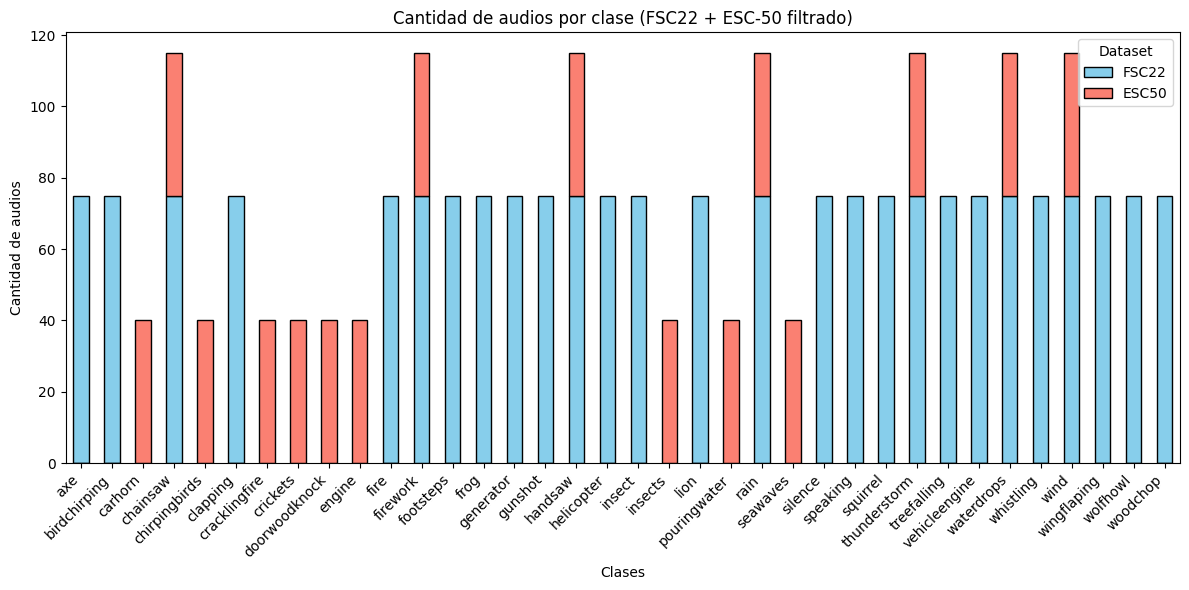

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# =====================
# 1. Leer datasets originales
# =====================
# FSC22
fsc22 = pd.read_csv("FSC22/Metadata-20220916T202011Z-001/Metadata/Metadata V1.0 FSC22.csv")
# ESC-50
esc50 = pd.read_csv("ESC-50/meta/esc50.csv")

# =====================
# 2. Normalizar etiquetas
# =====================
fsc22["label"] = fsc22["Class Name"].str.lower().str.replace(" ", "")
esc50["label"] = esc50["category"].str.lower().str.replace("_", "")

# =====================
# 3. Unificar "firework" y "fireworks"
# =====================
fsc22["label"] = fsc22["label"].replace("fireworks", "firework")
esc50["label"] = esc50["label"].replace("fireworks", "firework")

# =====================
# 4. Filtrar ESC50 (remover clases no usadas)
# =====================
remove_classes = [
    "cryingbaby","sneezing","clapping","breathing","coughing","footsteps","laughing",
    "brushingteeth","snoring","drinkingsipping","doorknock","mouseclick","keyboardtyping",
    "doorwoodcreaks","canopening","washingmachine","vacuumcleaner","clockalarm","clocktick",
    "glassbreaking","helicopter","siren","train","churchbells","airplane","cow","cat","dog",
    "crow","sheep","rooster","pig","hen","frog","toiletflush"
]
esc50 = esc50[~esc50["label"].isin(remove_classes)]

# =====================
# 5. Crear dataset combinado
# =====================
fsc22_formatted = fsc22[["Dataset File Name", "label"]].rename(columns={"Dataset File Name":"filename"})
esc50_formatted = esc50[["filename", "label"]]

combined = pd.concat([fsc22_formatted, esc50_formatted], ignore_index=True)
combined.insert(0, "ID", range(len(combined)))
combined.to_csv("FSC22andESC50.csv", index=False)

# =====================
# 6. Contar por dataset y clase
# =====================
fsc22_counts = fsc22_formatted["label"].value_counts()
esc50_counts = esc50_formatted["label"].value_counts()

all_classes = sorted(set(fsc22_counts.index).union(set(esc50_counts.index)))
df_counts = pd.DataFrame({
    "FSC22": [fsc22_counts.get(c, 0) for c in all_classes],
    "ESC50": [esc50_counts.get(c, 0) for c in all_classes]
}, index=all_classes)

# =====================
# 7. Graficar barras apiladas
# =====================
ax = df_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["skyblue", "salmon"],
    edgecolor="black"
)

plt.title("Cantidad de audios por clase (FSC22 + ESC-50 filtrado)")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Dataset")



plt.tight_layout()
plt.show()


CSV unificado creado con 2215 filas y 24 clases


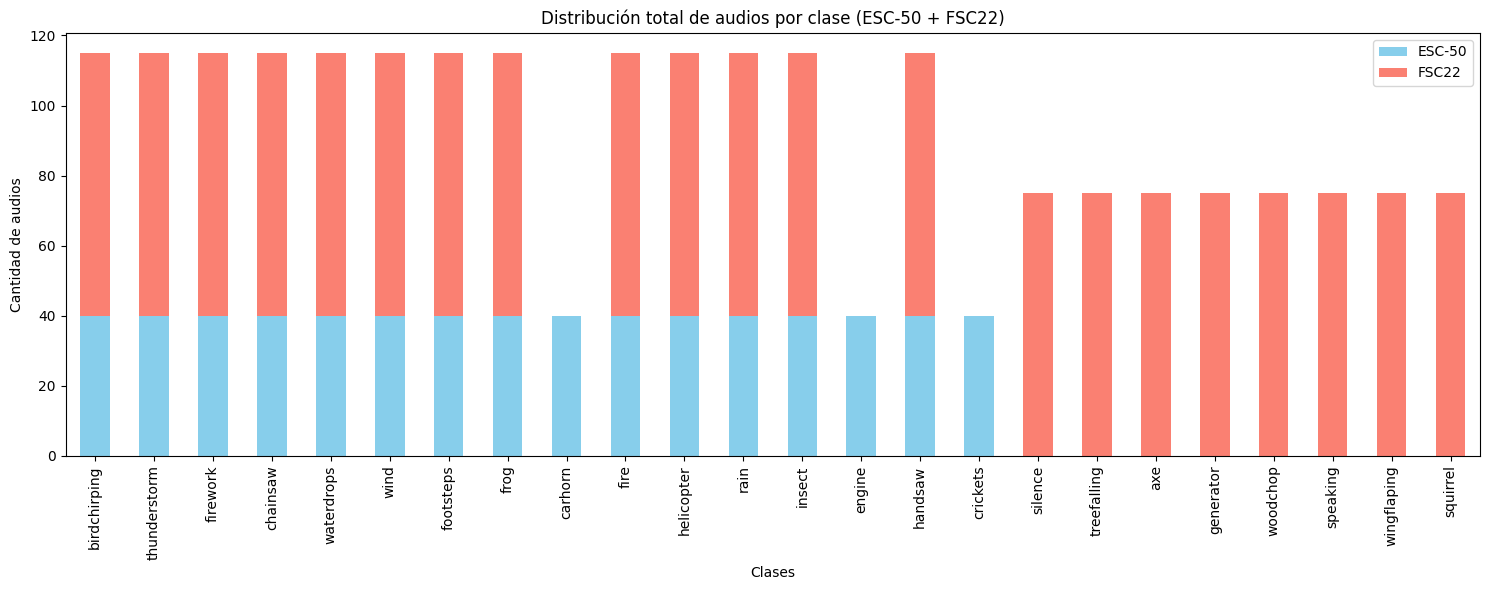

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Cargar datasets originales
# -----------------------------
esc50_path = "ESC-50/meta/esc50.csv"
fsc22_path = "FSC22/Metadata-20220916T202011Z-001/Metadata/Metadata V1.0 FSC22.csv"

esc50 = pd.read_csv(esc50_path)
fsc22 = pd.read_csv(fsc22_path)

# -----------------------------
# Normalizar nombres de clases
# -----------------------------
# ESC-50
esc50["label"] = esc50["category"].str.lower().str.replace("_", "", regex=False)

# FSC22
fsc22["label"] = fsc22["Class Name"].str.lower().str.replace("_", "", regex=False)

# -----------------------------
# Eliminar clases no deseadas
# -----------------------------
fsc22_remove = ["clapping", "gunshot", "wolfhowl", "lion","vehicleengine","whistling"]
esc50_remove = [
    "cryingbaby","sneezing","clapping","breathing","coughing","laughing",
    "brushingteeth","snoring","drinkingsipping","doorknock","mouseclick","keyboardtyping",
    "doorwoodcreaks","canopening","washingmachine","vacuumcleaner","clockalarm","clocktick",
    "glassbreaking","siren","train","churchbells","airplane","cow","cat","dog",
    "crow","sheep","rooster","pig","hen","toiletflush","doorwoodknock","pouringwater","seawaves"
]

fsc22 = fsc22[~fsc22["label"].isin(fsc22_remove)]
esc50 = esc50[~esc50["label"].isin(esc50_remove)]

# -----------------------------
# Renombrar clases para unificarlas
# -----------------------------
rename_map = {
    "chirpingbirds": "birdchirping",
    "cracklingfire": "fire",
    "insects": "insect",
    "fireworks": "firework"
}
esc50["label"] = esc50["label"].replace(rename_map)

# -----------------------------
# Crear CSV unificado
# -----------------------------
esc50_final = pd.DataFrame({
    "ID": range(1, len(esc50)+1),
    "filename": esc50["filename"],
    "label": esc50["label"]
})

start_id = len(esc50_final) + 1
fsc22_final = pd.DataFrame({
    "ID": range(start_id, start_id + len(fsc22)),
    "filename": fsc22["Dataset File Name"],
    "label": fsc22["label"]
})

# Fusionar
merged = pd.concat([esc50_final, fsc22_final], ignore_index=True)

# Guardar CSV final
merged.to_csv("ESC50_FSC22.csv", index=False, encoding="utf-8")

print("CSV unificado creado con", len(merged), "filas y", merged['label'].nunique(), "clases")

# -----------------------------
# Gráfico comparativo (barras apiladas)
# -----------------------------
esc50_counts = esc50_final["label"].value_counts().rename("ESC-50")
fsc22_counts = fsc22_final["label"].value_counts().rename("FSC22")

# Unir conteos por clase
counts = pd.concat([esc50_counts, fsc22_counts], axis=1).fillna(0)

# Graficar en barras apiladas
counts.plot(kind="bar", figsize=(15, 6), stacked=True, color=["skyblue", "salmon"])
plt.title("Distribución total de audios por clase (ESC-50 + FSC22)")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
import os
import shutil
import pandas as pd

# Rutas de origen
esc50_audio_path = "ESC-50/audio"
fsc22_audio_path = "FSC22/Audio Wise V1.0-20220916T202003Z-001/Audio Wise V1.0"

# Ruta de destino
output_dir = "ESC50_FSC22_wavfiles"
os.makedirs(output_dir, exist_ok=True)

# Cargar dataset unificado
df = pd.read_csv("ESC50_FSC22.csv")

# Copiar archivos según nombre
for idx, row in df.iterrows():
    filename = row["filename"]

    # Identificar el dataset por el nombre del archivo
    if "-" in filename:   # ESC-50 usa guiones
        src = os.path.join(esc50_audio_path, filename)
    elif "_" in filename: # FSC22 usa guiones bajos
        src = os.path.join(fsc22_audio_path, filename)
    else:
        print(f"[WARN] No se reconoce el origen del archivo: {filename}")
        continue

    dst = os.path.join(output_dir, filename)

    # Copiar si existe
    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"[ERROR] No se encontró: {src}")

print("✅ Todos los archivos fueron copiados a", output_dir)


✅ Todos los archivos fueron copiados a ESC50_FSC22_wavfiles


✅ Dataset guardado en dataset_oficial.csv
✅ Carpeta unificada creada en dataset_wavfiles


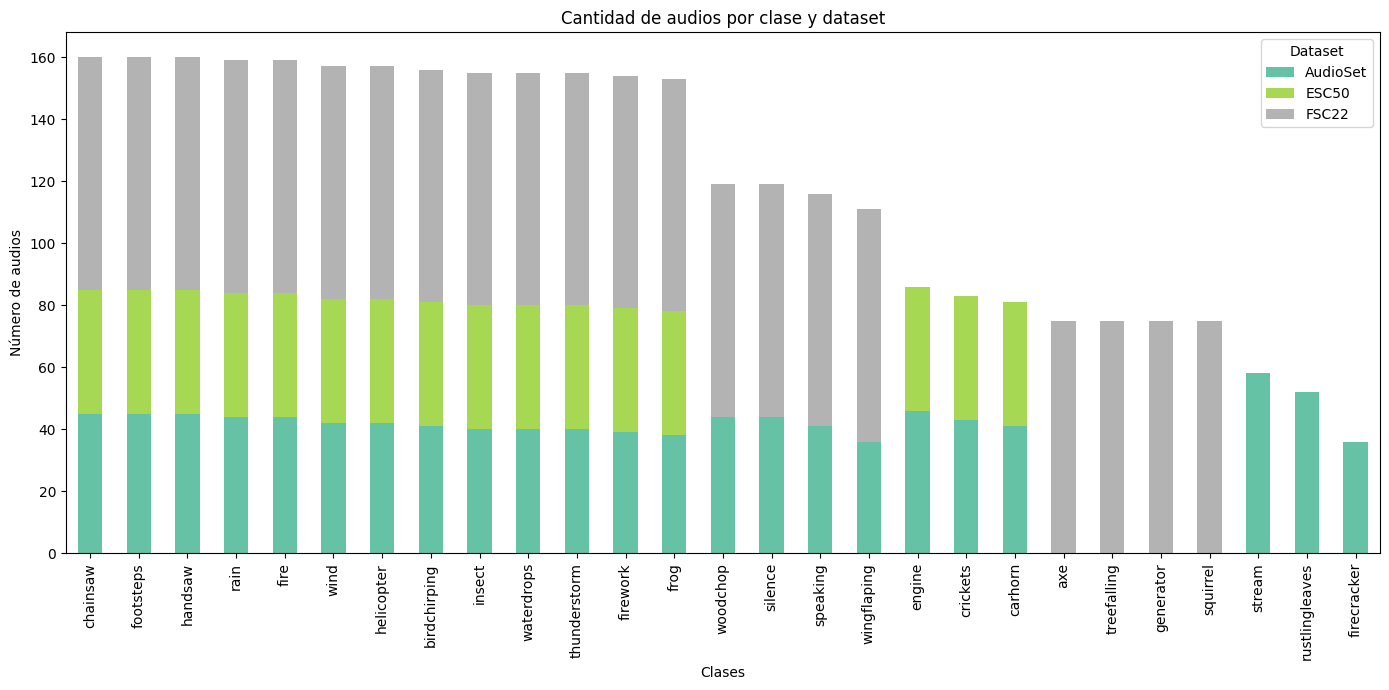

In [7]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

# --- Rutas ---
esc50_fsc22_csv = "ESC50_FSC22.csv"
audioset_csv = "AudioSet_wavfiles/Audioset.csv"
output_csv = "dataset_oficial.csv"

esc50_fsc22_audio = "ESC50_FSC22_wavfiles"
audioset_audio = "AudioSet_wavfiles"
output_audio = "dataset_wavfiles"

# --- Cargar datasets ---
df1 = pd.read_csv(esc50_fsc22_csv)
df2 = pd.read_csv(audioset_csv)

# Identificar fuente según su procedencia
df1["source"] = df1["filename"].apply(lambda x: "ESC50" if "-" in x else "FSC22")
df2["source"] = "AudioSet"

# Concatenar
df_final = pd.concat([df1, df2], ignore_index=True)

# Guardar CSV oficial
df_final.to_csv(output_csv, index=False)
print(f"✅ Dataset guardado en {output_csv}")

# --- Fusionar carpetas de audio ---
os.makedirs(output_audio, exist_ok=True)

for src_dir in [esc50_fsc22_audio, audioset_audio]:
    for file in os.listdir(src_dir):
        src = os.path.join(src_dir, file)
        dst = os.path.join(output_audio, file)

        # Copiar solo si no existe para evitar duplicados
        if not os.path.exists(dst):
            shutil.copy(src, dst)

print(f"✅ Carpeta unificada creada en {output_audio}")

# --- Graficar ---
# Contar audios por clase y dataset
counts = df_final.groupby(["label", "source"]).size().unstack(fill_value=0)

# Ordenar por total
counts["total"] = counts.sum(axis=1)
counts = counts.sort_values("total", ascending=False).drop(columns="total")

# Plot
ax = counts.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="Set2"
)

plt.title("Cantidad de audios por clase y dataset")
plt.xlabel("Clases")
plt.ylabel("Número de audios")
plt.xticks(rotation=90)
plt.legend(title="Dataset", loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Cargar dataset original
df = pd.read_csv("dataset_oficial.csv")

# Definir las clases
illegal_logging = ["chainsaw","handsaw","axe","treefalling","firecracker"]

forest_ambience = [
    "rain", "fire", "wind", "stream", "insect", "birdchirping",
    "waterdrops", "thunderstorm", "frog", "wingflaping",
    "crickets", "squirrel", "rustlingleaves"
]

human_activity_noise = [
    "footsteps", "helicopter", "silence", "carhorn", "woodchop",
    "speaking", "firework", "engine", "generator"
]

# Función para reasignar etiquetas
def map_class(label):
    if label in illegal_logging:
        return label   # se mantienen igual
    elif label in forest_ambience:
        return "forest_ambience"
    elif label in human_activity_noise:
        return "human_activity_noise"
    else:
        return "unknown"

# Aplicar mapeo
df["label"] = df["label"].apply(map_class)

# Guardar dataset reducido
df.to_csv("dataset_reducido.csv", index=False)

# Ver un resumen
print(df["label"].value_counts())


label
forest_ambience         1628
human_activity_noise    1067
chainsaw                 160
handsaw                  160
treefalling               75
axe                       75
firecracker               36
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Cargar dataset original
df = pd.read_csv("dataset_oficial.csv")

# Definir las clases
illegal_logging = ["chainsaw","handsaw","axe","firecracker"]

tree_falling = ["treefalling"]

forest_ambience = [
    "rain", "fire", "wind", "stream", "insect", "birdchirping",
    "waterdrops", "thunderstorm", "frog", "wingflaping",
    "crickets", "squirrel", "rustlingleaves"
]

human_activity_noise = [
    "footsteps", "helicopter", "silence", "carhorn", "woodchop",
    "speaking", "firework", "engine", "generator"
]

# Función para reasignar etiquetas
def map_class(label):
    if label in tree_falling:
        return label   # se mantienen igual
    elif label in illegal_logging:
        return "illegal_logging"
    elif label in forest_ambience:
        return "forest_ambience"
    elif label in human_activity_noise:
        return "human_activity_noise"
    else:
        return "unknown"

# Aplicar mapeo
df["label"] = df["label"].apply(map_class)

df_balanced = (
    df.groupby("label", group_keys=False)
      .apply(lambda x: x.sample(n=800, random_state=42) if x.name in ["forest_ambience","human_activity_noise"] else x)
)

# Guardar dataset reducido
df_balanced.to_csv("dataset_reducido_2.csv", index=False)

# Ver un resumen
print(df_balanced["label"].value_counts())

# --- Gráfico de barras ---
df_balanced["label"].value_counts().plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Distribución balanceada de clases")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label
forest_ambience         800
human_activity_noise    800
illegal_logging         431
treefalling              75
Name: count, dtype: int64


C:\Users\W11\AppData\Local\Temp\ipykernel_29432\218717290.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=800, random_state=42) if x.name in ["forest_ambience","human_activity_noise"] else x)


label
forest_ambience         250
human_activity_noise    250
chainsaw                115
handsaw                 115
treefalling              75
axe                      75
Name: count, dtype: int64


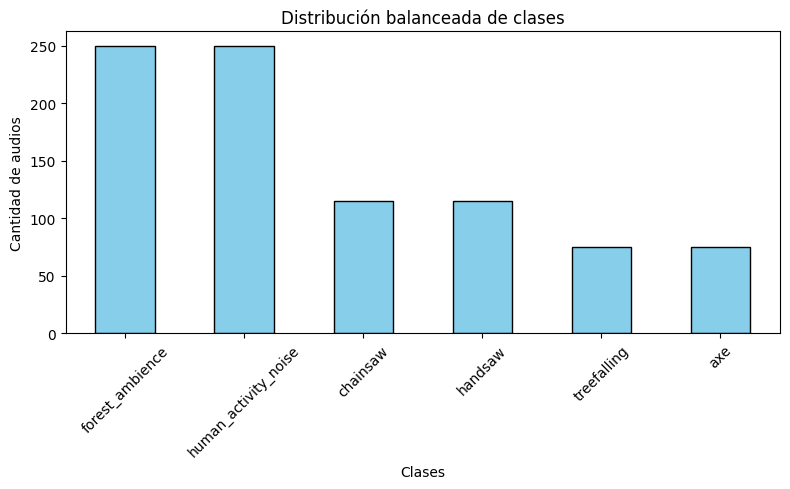

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset reducido
df = pd.read_csv("dataset_reducido.csv")

# --- Eliminar audios de Audioset ---
# Supongamos que todos los audios de Audioset contienen la palabra "audioset" en la columna filename
df = df[~df["source"].str.contains("AudioSet", case=False, na=False)]

# --- Submuestreo (undersampling) ---
forest_df = df[df["label"] == "forest_ambience"].sample(n=250, random_state=42)
human_df = df[df["label"] == "human_activity_noise"].sample(n=250, random_state=42)

# --- Oversampling (duplicado) ---
treefalling_df = df[df["label"] == "treefalling"]
axe_df = df[df["label"] == "axe"]
firecracker_df = df[df["label"] == "firecracker"]

# Mantener chainsaw y handsaw como están
chainsaw_df = df[df["label"] == "chainsaw"]
handsaw_df = df[df["label"] == "handsaw"]

# Concatenar todo
df_balanced = pd.concat([
    forest_df,
    human_df,
    chainsaw_df,
    handsaw_df,
    treefalling_df,
    axe_df,
    firecracker_df
], ignore_index=True)

# Guardar dataset balanceado
df_balanced.to_csv("dataset_balanceado.csv", index=False)

# Ver resumen final
print(df_balanced["label"].value_counts())

# --- Gráfico de barras ---
df_balanced["label"].value_counts().plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Distribución balanceada de clases")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

label
forest_ambience         600
human_activity_noise    600
illegal_logging         305
treefalling              75
Name: count, dtype: int64


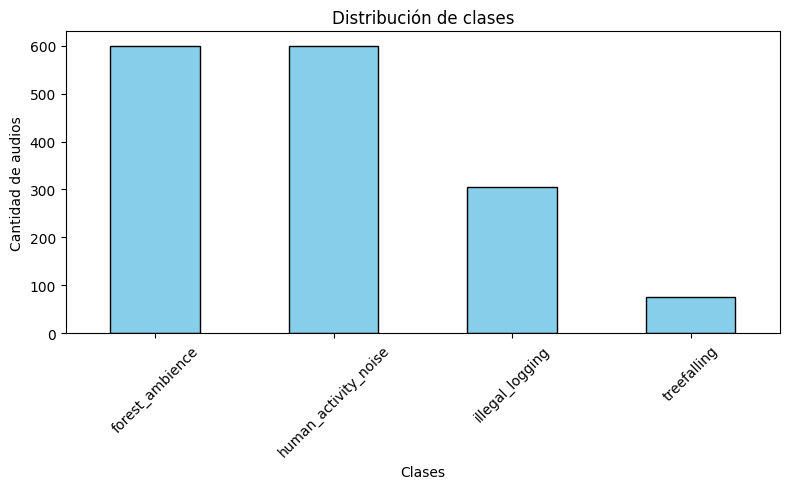

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset reducido
df = pd.read_csv("dataset_reducido.csv")

# --- Eliminar audios de Audioset ---
df = df[~df["source"].str.contains("AudioSet", case=False, na=False)]

# --- Reasignar clases ---
df["label"] = df["label"].replace({
    "chainsaw": "illegal_logging",
    "handsaw": "illegal_logging",
    "axe": "illegal_logging"
})

# --- Submuestreo (undersampling) ---
forest_df = df[df["label"] == "forest_ambience"].sample(n=600, random_state=42)
human_df = df[df["label"] == "human_activity_noise"].sample(n=600, random_state=42)

# --- Oversampling (duplicado si quieres equilibrar más adelante) ---
treefalling_df = df[df["label"] == "treefalling"]
firecracker_df = df[df["label"] == "firecracker"]

# Mantener illegal_logging tal cual
illegal_df = df[df["label"] == "illegal_logging"]

# Concatenar todo
df_balanced = pd.concat([
    forest_df,
    human_df,
    illegal_df,
    treefalling_df,
    firecracker_df
], ignore_index=True)

# Guardar dataset balanceado
df_balanced.to_csv("dataset_balanceado_2.csv", index=False)

# Ver resumen final
print(df_balanced["label"].value_counts())

# --- Gráfico de barras ---
df_balanced["label"].value_counts().plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Distribución de clases")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


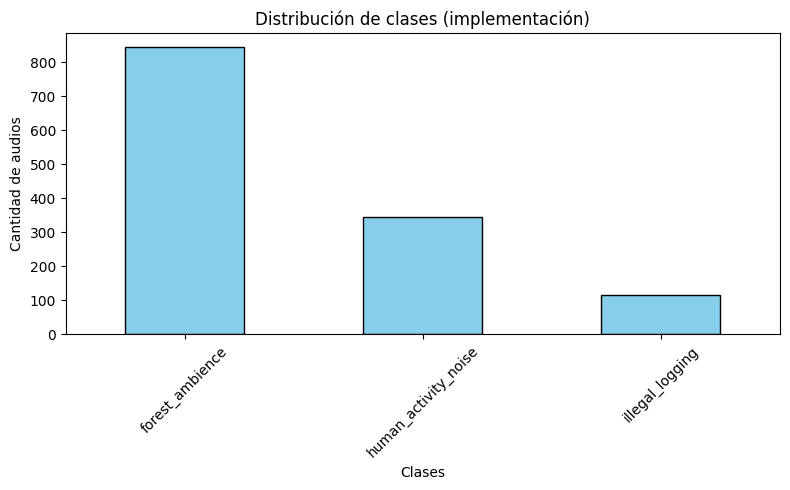

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset reducido
df_balanced_3 = pd.read_csv("dataset_balanceado_3.csv")

# --- Gráfico de barras ---
df_balanced_3["label"].value_counts().plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Distribución de clases (implementación)")
plt.xlabel("Clases")
plt.ylabel("Cantidad de audios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
# --- Configuración inicial ---
import os
import shutil
import pandas as pd

# Ruta del archivo CSV
csv_path = "dataset_balanceado_2.csv"

# Carpeta donde están los audios originales
audios_src = "dataset_wavfiles"

# Carpeta destino donde se crearán las subcarpetas
output_dir = "Audios ESC-4"

# Crear carpeta principal si no existe
os.makedirs(output_dir, exist_ok=True)

# Leer el archivo CSV
df = pd.read_csv(csv_path)

# Mostrar las primeras filas para verificar
print("Ejemplo del CSV:")
print(df.head(), "\n")

# Obtener las clases únicas
labels = df['label'].unique()
print("Clases encontradas:", labels, "\n")

# Crear subcarpetas por clase
for label in labels:
    class_dir = os.path.join(output_dir, label)
    os.makedirs(class_dir, exist_ok=True)

# Copiar archivos según su clase
copiados = 0
no_encontrados = []

for _, row in df.iterrows():
    filename = row['filename']
    label = row['label']
    
    src_file = os.path.join(audios_src, filename)
    dst_file = os.path.join(output_dir, label, filename)
    
    # Verificar si el archivo existe
    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)
        copiados += 1
    else:
        no_encontrados.append(filename)

print(f"✅ Archivos copiados correctamente: {copiados}")
print(f"⚠️ Archivos no encontrados: {len(no_encontrados)}")

# Mostrar algunos que no se encontraron
if no_encontrados:
    print("\nEjemplo de archivos no encontrados:")
    print(no_encontrados[:10])


Ejemplo del CSV:
     ID          filename            label source
0  1990      22_12275.wav  forest_ambience  FSC22
1   602  5-233787-A-7.wav  forest_ambience  ESC50
2   104  1-57316-A-13.wav  forest_ambience  ESC50
3   975       5_10535.wav  forest_ambience  FSC22
4  1002       5_10562.wav  forest_ambience  FSC22 

Clases encontradas: ['forest_ambience' 'human_activity_noise' 'illegal_logging' 'treefalling'] 

✅ Archivos copiados correctamente: 1580
⚠️ Archivos no encontrados: 0


In [ ]:
import pandas as pd
import json

# Ruta del CSV
csv_path = "dataset_balanceado_2.csv"

# Leer el CSV
df = pd.read_csv(csv_path)

# Crear diccionario {filename: label}
labels_dict = dict(zip(df['filename'], df['label']))

# Guardar como JSON (info.labels)
output_path = "info.labels"
with open(output_path, "w") as f:
    json.dump(labels_dict, f, indent=4)

print("✅ Archivo 'info.labels' generado correctamente.")
print(f"Total de archivos: {len(labels_dict)}")


: 

In [1]:
import os
import json

# Ruta principal del dataset
base_path = "Audios ESC-4"

# Inicializamos la estructura base del JSON
data = {
    "version": 1,
    "files": []
}

# Recorremos las subcarpetas
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    # Ignorar si no es carpeta o si es la carpeta "treefalling"
    if not os.path.isdir(folder_path) or folder_name == "treefalling":
        continue
    
    # Recorremos los archivos dentro de cada subcarpeta
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".wav"):
            file_entry = {
                "path": f"{folder_name}/{filename}",
                "name": filename,
                "category": "training",
                "label": {
                    "type": "label",
                    "label": folder_name
                }
            }
            data["files"].append(file_entry)

# Guardar el archivo JSON
output_path = os.path.join(base_path, "info.labels")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4, ensure_ascii=False)

print(f"✅ Archivo 'info.labels' creado en: {output_path}")
print(f"Total de archivos procesados: {len(data['files'])}")


✅ Archivo 'info.labels' creado en: Audios ESC-4\info.labels
Total de archivos procesados: 1505


In [1]:
import os
import pandas as pd
import shutil

# === CONFIGURACIÓN ===
csv_path = "dataset_oficial.csv"            # Ruta de tu CSV
audio_dir = "dataset_wavfiles"              # Carpeta original con los audios
output_dir = "Audios_ESC4_v2"               # Carpeta destino

# === LEE EL CSV ===
df = pd.read_csv(csv_path)

# === FILTRA SOLO LAS FUENTES DE INTERÉS ===
df = df[df["source"].isin(["ESC50", "FSC22"])]

# === MAPEOS DE LABELS A CATEGORÍAS ===
categories = {
    "illegal_logging": ["chainsaw"],
    "forest_ambience": ["rain", "fire", "wind", "thunderstorm", "waterdrops", "insect", "birdchirping", "crickets"],
    "human_activity_noise": ["helicopter", "engine", "generator", "firework"]
}

# === CREA LAS CARPETAS DE DESTINO ===
for cat in categories.keys():
    os.makedirs(os.path.join(output_dir, cat), exist_ok=True)

# === CONTADOR PARA RENOMBRAR ARCHIVOS ===
counters = {label: 1 for sublist in categories.values() for label in sublist}

# === PROCESA Y COPIA LOS AUDIOS ===
for _, row in df.iterrows():
    filename = row["filename"]
    label = row["label"]

    # Verifica si el archivo existe
    src_path = os.path.join(audio_dir, filename)
    if not os.path.exists(src_path):
        print(f"⚠️ Archivo no encontrado: {filename}")
        continue

    # Determina la categoría según el label
    category = None
    for cat, labels in categories.items():
        if label in labels:
            category = cat
            break

    # Si el label no pertenece a ninguna categoría, lo omite
    if category is None:
        continue

    # Nuevo nombre de archivo (e.g. thunderstorm-3.wav)
    new_filename = f"{label}-{counters[label]}.wav"
    counters[label] += 1

    dest_path = os.path.join(output_dir, category, new_filename)
    shutil.copy2(src_path, dest_path)

print("✅ Organización completada con éxito.")


✅ Organización completada con éxito.


In [1]:
import os
import librosa
import soundfile as sf

# Ruta de tu carpeta base
base_dir = "Audios_ESC4_v2"
# Carpeta de salida (puedes mantener la misma o crear una nueva)
output_base = "Audios_ESC4_v2_16k"

# Crear carpeta de salida si no existe
os.makedirs(output_base, exist_ok=True)

# Recorrer todas las subcarpetas y archivos
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(".wav"):
            input_path = os.path.join(root, file)

            # Crear la carpeta de salida correspondiente
            relative_path = os.path.relpath(root, base_dir)
            output_dir = os.path.join(output_base, relative_path)
            os.makedirs(output_dir, exist_ok=True)

            # Cargar el audio original
            try:
                y, sr = librosa.load(input_path, sr=None)  # sr=None mantiene la original
                # Convertir a 16 kHz
                y_16k = librosa.resample(y, orig_sr=sr, target_sr=16000)

                # Guardar el audio convertido
                output_path = os.path.join(output_dir, file)
                sf.write(output_path, y_16k, 16000)

                print(f"✅ Convertido: {input_path} → {output_path}")
            except Exception as e:
                print(f"❌ Error con {input_path}: {e}")

print("\n🚀 Conversión completada. Todos los audios están a 16 kHz.")


✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-1.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-1.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-10.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-10.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-100.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-100.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-101.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-101.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-102.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-102.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-103.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-103.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-104.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-104.wav
✅ Convertido: Audios_ESC4_v2\forest_ambience\birdchirping-105.wav → Audios_ESC4_v2_16k\forest_ambience\birdchirping-105.wav
✅ Convertido: 

In [1]:
import os
import pandas as pd

# Ruta principal donde están las carpetas
base_path = "Audios_ESC4_v2_16k"

# Subcarpetas que representan las clases
labels = ["forest_ambience", "human_activity_noise", "illegal_logging"]

data = []
current_id = 1

for label in labels:
    folder_path = os.path.join(base_path, label)
    
    # Verifica que exista la carpeta
    if not os.path.isdir(folder_path):
        print(f"⚠️ Carpeta no encontrada: {folder_path}")
        continue
    
    # Recorre todos los archivos wav
    for file in os.listdir(folder_path):
        if file.lower().endswith(".wav"):
            data.append({
                "ID": current_id,
                "filename": file,
                "label": label
            })
            current_id += 1

# Crear DataFrame
df = pd.DataFrame(data, columns=["ID", "filename", "label"])

# Guardar CSV
output_file = "dataset_balanceado_3.csv"
df.to_csv(output_file, index=False)

print(f"🎉 Dataset creado: {output_file}")
print(df.head())


🎉 Dataset creado: dataset_balanceado_3.csv
   ID              filename            label
0   1    birdchirping-1.wav  forest_ambience
1   2   birdchirping-10.wav  forest_ambience
2   3  birdchirping-100.wav  forest_ambience
3   4  birdchirping-101.wav  forest_ambience
4   5  birdchirping-102.wav  forest_ambience


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# ❗❗ COLOCA AQUÍ TUS ARCHIVOS CSV
# -------------------------------------------------------
csv_files = {
    "Parlante 1": "parlante1.csv",
    "Parlante 2": "parlante2.csv",
    "Parlante 3": "parlante3.csv",
    "Parlante 4": "parlante4.csv"
}

# -------------------------------------------------------
# ❗❗ COLOCA AQUÍ LA DISTANCIA MÁXIMA DETECTADA DE CADA PARLANTE
# (en metros)
# -------------------------------------------------------
distancias_max = {
    "Parlante 1": 12.5,
    "Parlante 2": 10.3,
    "Parlante 3": 14.2,
    "Parlante 4": 9.8
}

# -------------------------------------------------------
# ❗❗ COLOCA AQUÍ EL NOMBRE DE LAS COLUMNAS DE TU CSV
# -------------------------------------------------------
col_dist = "distancia_m"
col_db = "decibelios"

plt.figure(figsize=(10, 6))

for nombre, file in csv_files.items():
    df = pd.read_csv(file)

    # Graficar la medición
    plt.plot(df[col_dist], df[col_db], label=nombre)

    # Marcar la distancia máxima
    dmax = distancias_max[nombre]
    dbmax = df[df[col_dist] == df[col_dist].iloc[(df[col_dist]-dmax).abs().argmin()]][col_db].values[0]

    plt.scatter(dmax, dbmax, s=80, marker="o")
    plt.text(dmax, dbmax, f"  {dmax} m", fontsize=9)

plt.xlabel("Distancia (m)")
plt.ylabel("Nivel de sonido (dB)")
plt.title("Relación entre distancia y nivel de decibelios para los 4 parlantes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

input_file = "parlante2.txt"
output_file = "parlante2.csv"

leq_values = []

with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

data_section = False

for line in lines:
    line = line.strip()

    # Detectar inicio de la tabla
    if "Leq (dB-A)" in line:
        data_section = True
        continue

    if data_section:
        if "," in line:
            # Separar en partes: ej → ["62", "8", "1763829073027"]
            parts = line.split(",")

            # Asegurar que existen al menos 2 partes
            if len(parts) >= 2:

                # Los dos primeros campos son el Leq: entero y decimal
                leq_str = parts[0] + "." + parts[1]   # "62" + "." + "8" → "62.8"

                try:
                    leq = float(leq_str)
                    leq_values.append(leq)
                except:
                    pass

# Crear dataframe
df = pd.DataFrame({"Leq_dBA": leq_values})

# Guardar CSV
df.to_csv(output_file, index=False)

print(f"CSV generado: {output_file}")



CSV generado: parlante2.csv
